In [152]:
#import
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cv2
from scipy import signal

debugMode = False
paddingTime = 17000
# 1 
# 2
# 3 17000

#基本的なコード
#フォントサイズの変更
plt.rcParams["font.size"] = 28
plt.rcParams['font.family'] = "IPAexGothic"

In [153]:
# csvの読み込み
# ヘッダなしの場合csv = pd.read_csv("ファイル名(.csv)", header=None, names=['user_id', 'name'])で可能
fname = "../data/2回目/"
acc = pd.read_csv(fname+"acc.csv",encoding = 'utf-8')
ans = pd.read_csv(fname+"ans.csv",encoding = 'utf-8')

print(acc)
print(ans)

            time         x         y         z       abs
0       0.292859 -0.699107  0.411803  0.038307  0.812280
1       0.312871 -0.603339  0.383072  0.019154  0.714933
2       0.332873  0.153229 -0.095768 -0.153229  0.236917
3       0.352868 -0.181959  0.067038 -0.191536  0.272561
4       0.372911 -0.229843  0.143652 -0.114922  0.294399
...          ...       ...       ...       ...       ...
8243  165.152866  0.316035 -0.172383 -0.057461  0.364548
8244  165.172861  0.450110 -0.019154 -2.145205  2.192001
8245  165.192861 -0.344765  0.134075  0.507571  0.628066
8246  165.212840  0.191536 -0.038307  0.000000  0.195329
8247  165.232861  0.105345 -0.373495 -0.134075  0.410576

[8248 rows x 5 columns]
            time content
0  1692565879228     止まる
1  1692565883793      歩く
2  1692565926067      走る
3  1692565943806      歩く
4  1692565983787      走る
5  1692566003808      歩く
6  1692566004444     止まる


止まる
17.0 21.565
歩く
21.565 63.839
走る
63.839 81.578
歩く
81.578 121.559
走る
121.559 141.58
歩く
141.58 142.216
止まる
142.216 165.2328606


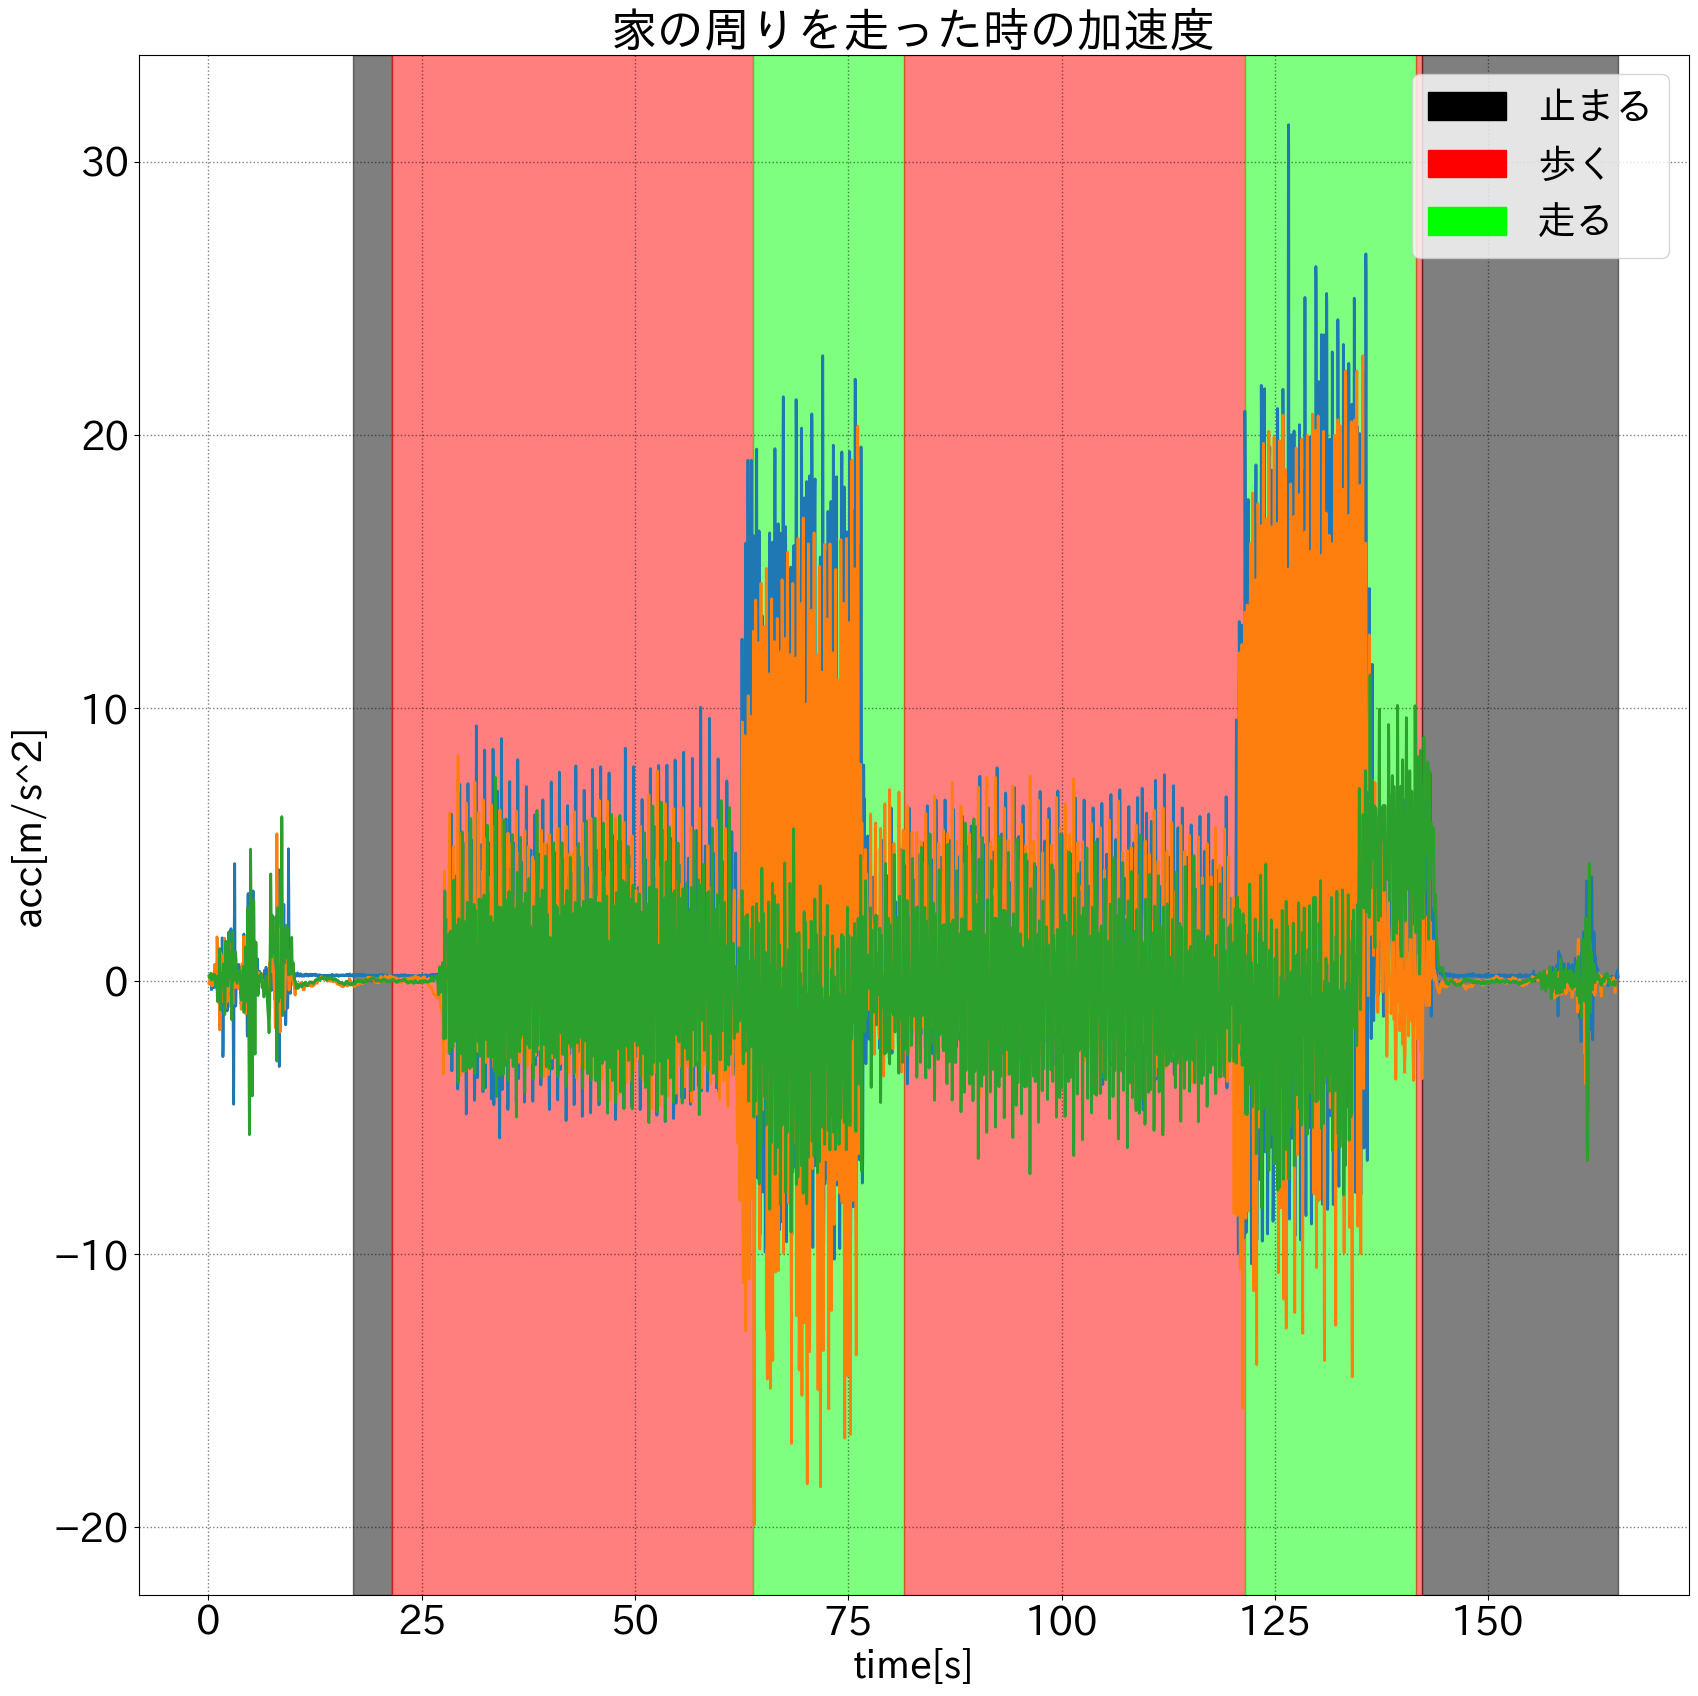

In [154]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title("家の周りを走った時の加速度")
## x軸のラベル
ax3.set_xlabel('time[s]')
## y軸のラベル
ax3.set_ylabel('acc[m/s^2]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作
## ノイズ除去
ax3.plot(
    (acc["time"]),
    acc["x"].rolling(window=5).mean(),
    label="x軸",
    linewidth=2,  # 線の太さを指定
)

ax3.plot(
    (acc["time"] - acc["time"][0]),
    acc["z"].rolling(window=5).mean(),
    label="z軸",
    linewidth=2,  # 線の太さを指定
)

ax3.plot(
    (acc["time"] - acc["time"][0]),
    acc["y"].rolling(window=5).mean(),
    label="y軸",
    linewidth=2,  # 線の太さを指定
)

ax3.legend()

# 各contentに対応する色の辞書を作成
content_colors = {
    "止まる": "#000000",
    "歩く": "#ff0000",
    "走る": "#00ff00"
}

# 階段利用区間をラベリング
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    print(content)
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0] + paddingTime) / 1000
    end_time = 0
    if i < len(ans) - 1 :
        end_time = (ans["time"][i + 1] - ans["time"][0] + paddingTime) / 1000
    else :
        end_time = (acc["time"].max())

    print(start_time, end_time)
    ax3.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

# 凡例の作成
content_labels = list(content_colors.keys())
content_patches = [matplotlib.patches.Patch(color=color) for color in content_colors.values()]

# 凡例の表示
ax3.legend(content_patches, content_labels, loc="upper right")

plt.show()

止まる
17.0 21.565
歩く
21.565 63.839
走る
63.839 81.578
歩く
81.578 121.559
走る
121.559 141.58
歩く
141.58 142.216
止まる
142.216 165.2328606


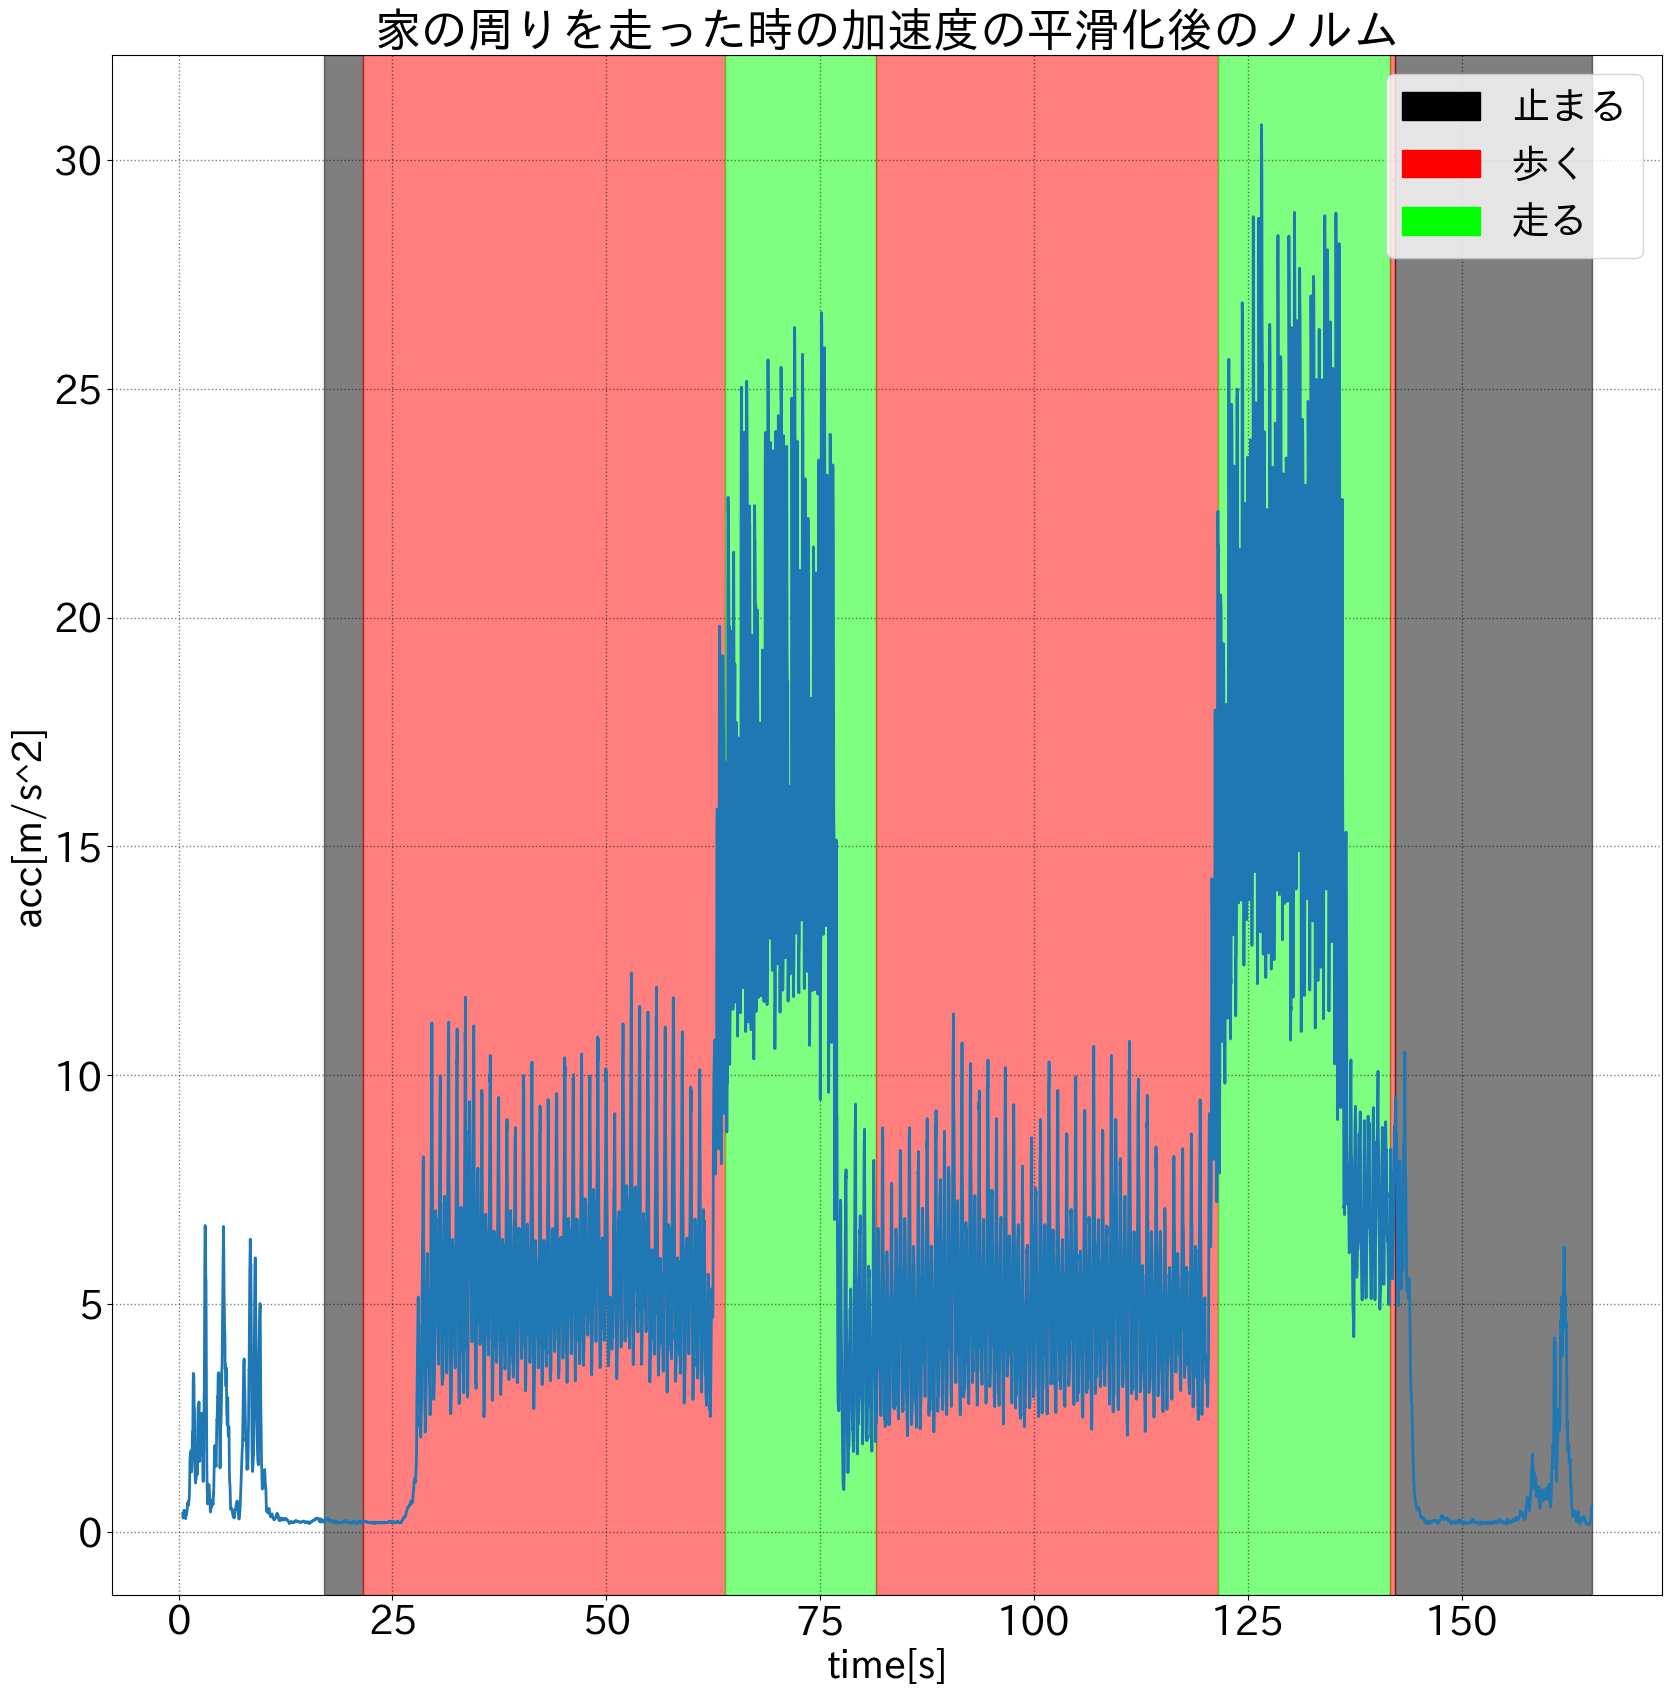

In [155]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title("家の周りを走った時の加速度の平滑化後のノルム")
## x軸のラベル
ax3.set_xlabel('time[s]')
## y軸のラベル
ax3.set_ylabel('acc[m/s^2]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作

x = acc["x"]
y = acc["y"]
z = acc["z"]
norm_acc = np.sqrt(x*x + y*y + z*z).rolling(window=10).mean()

## ノイズ除去
ax3.plot(
    (acc["time"]),
    norm_acc,
    label="x軸",
    linewidth=2,  # 線の太さを指定
)

ax3.legend()

# 各contentに対応する色の辞書を作成
content_colors = {
    "止まる": "#000000",
    "歩く": "#ff0000",
    "走る": "#00ff00"
}

# 階段利用区間をラベリング
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    print(content)
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0] + paddingTime) / 1000
    end_time = 0
    if i < len(ans) - 1 :
        end_time = (ans["time"][i + 1] - ans["time"][0] + paddingTime) / 1000
    else :
        end_time = (acc["time"].max())

    print(start_time, end_time)
    ax3.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

# 凡例の作成
content_labels = list(content_colors.keys())
content_patches = [matplotlib.patches.Patch(color=color) for color in content_colors.values()]

# 凡例の表示
ax3.legend(content_patches, content_labels, loc="upper right")

plt.show()

周波数 2.2
止まる
17.0 21.565
歩く
21.565 63.839
走る
63.839 81.578
歩く
81.578 121.559
走る
121.559 141.58
歩く
141.58 142.216
止まる
142.216 165.2328606


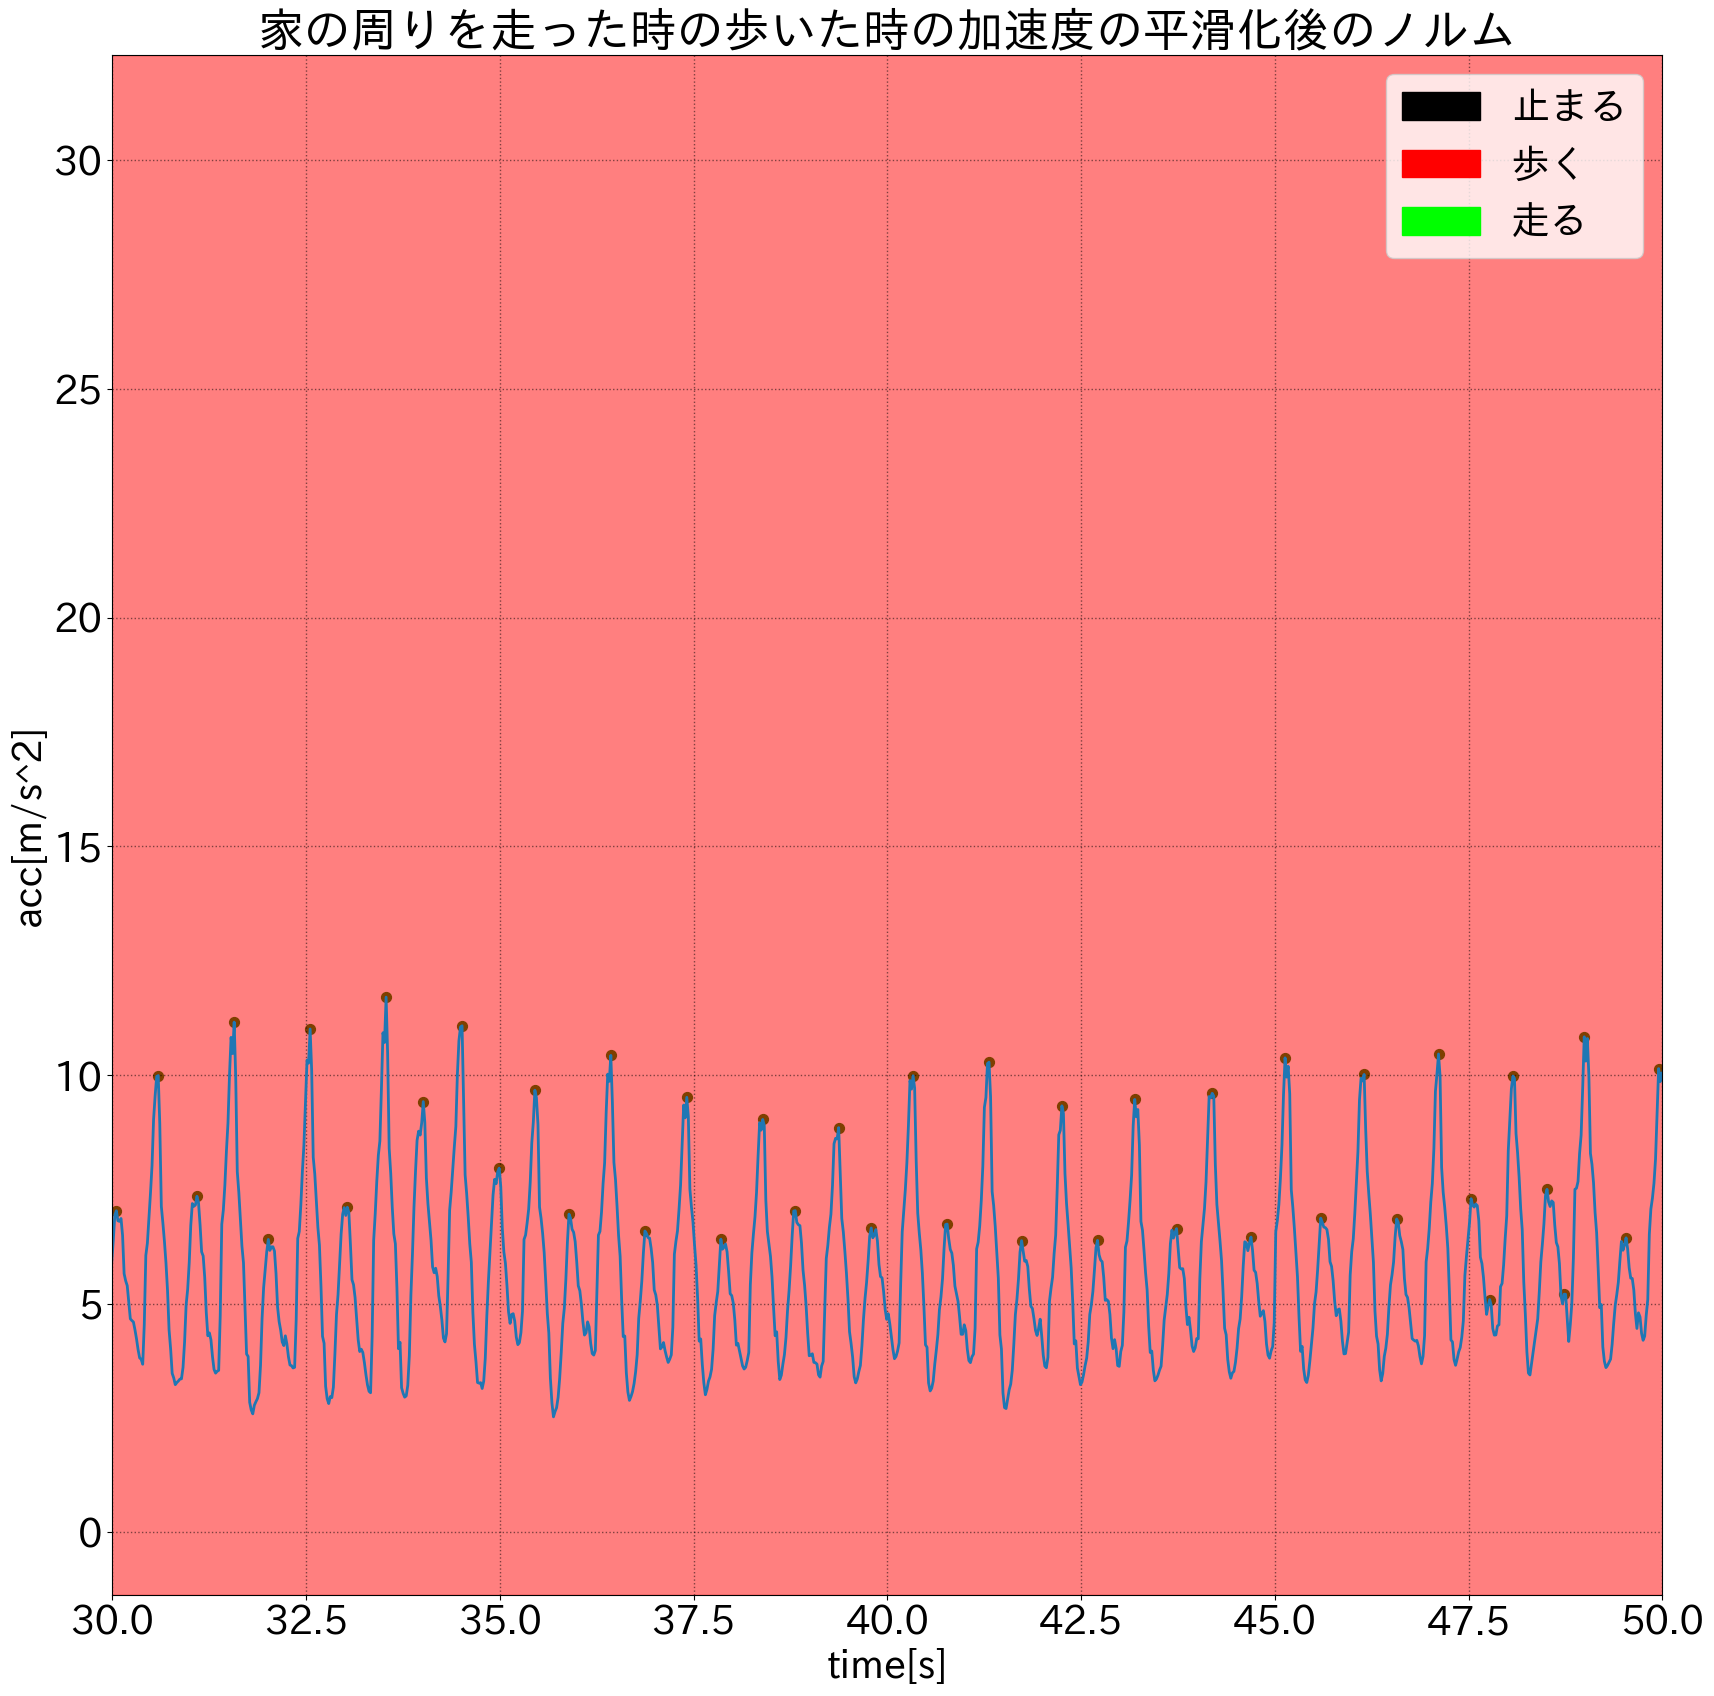

In [156]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title("家の周りを走った時の歩いた時の加速度の平滑化後のノルム")
## x軸のラベル
ax3.set_xlabel('time[s]')
## y軸のラベル
ax3.set_ylabel('acc[m/s^2]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作

x = acc["x"]
y = acc["y"]
z = acc["z"]
norm_acc = np.sqrt(x*x + y*y + z*z).rolling(window=10).mean()

## ノイズ除去
ax3.plot(
    (acc["time"]),
    norm_acc,
    label="x軸",
    linewidth=2,  # 線の太さを指定
)

## ピーク値を取得
peak , _ = signal.find_peaks(norm_acc, height=5, distance=10)
plt.scatter(acc["time"][peak], norm_acc[peak], c="g", s=50)

ax3.legend()

# 各contentに対応する色の辞書を作成
content_colors = {
    "止まる": "#000000",
    "歩く": "#ff0000",
    "走る": "#00ff00"
}


## 表示するデータの範囲を指定秒数にする
start_time = 30
end_time = 50
ax3.set_xlim(start_time, end_time)

## 周波数の取得
new_peak = []
for i in range(len(peak) - 1):
    ## endtime - starttimeの間にピークがあるかどうか
    # print(acc["time"][peak[i]])
    if (acc["time"][peak[i]] > start_time ) and (acc["time"][peak[i]] < end_time ):
        new_peak.append(peak[i])
freq = len(new_peak) / (end_time - start_time)
print("周波数", freq)

# 階段利用区間をラベリング
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    print(content)
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0] + paddingTime) / 1000
    end_time = 0
    if i < len(ans) - 1 :
        end_time = (ans["time"][i + 1] - ans["time"][0] + paddingTime) / 1000
    else :
        end_time = (acc["time"].max())

    print(start_time, end_time)
    ax3.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

# 凡例の作成
content_labels = list(content_colors.keys())
content_patches = [matplotlib.patches.Patch(color=color) for color in content_colors.values()]

# 凡例の表示
ax3.legend(content_patches, content_labels, loc="upper right")

plt.show()

周波数 2.7
止まる
17.0 21.565
歩く
21.565 63.839
走る
63.839 81.578
歩く
81.578 121.559
走る
121.559 141.58
歩く
141.58 142.216
止まる
142.216 165.2328606


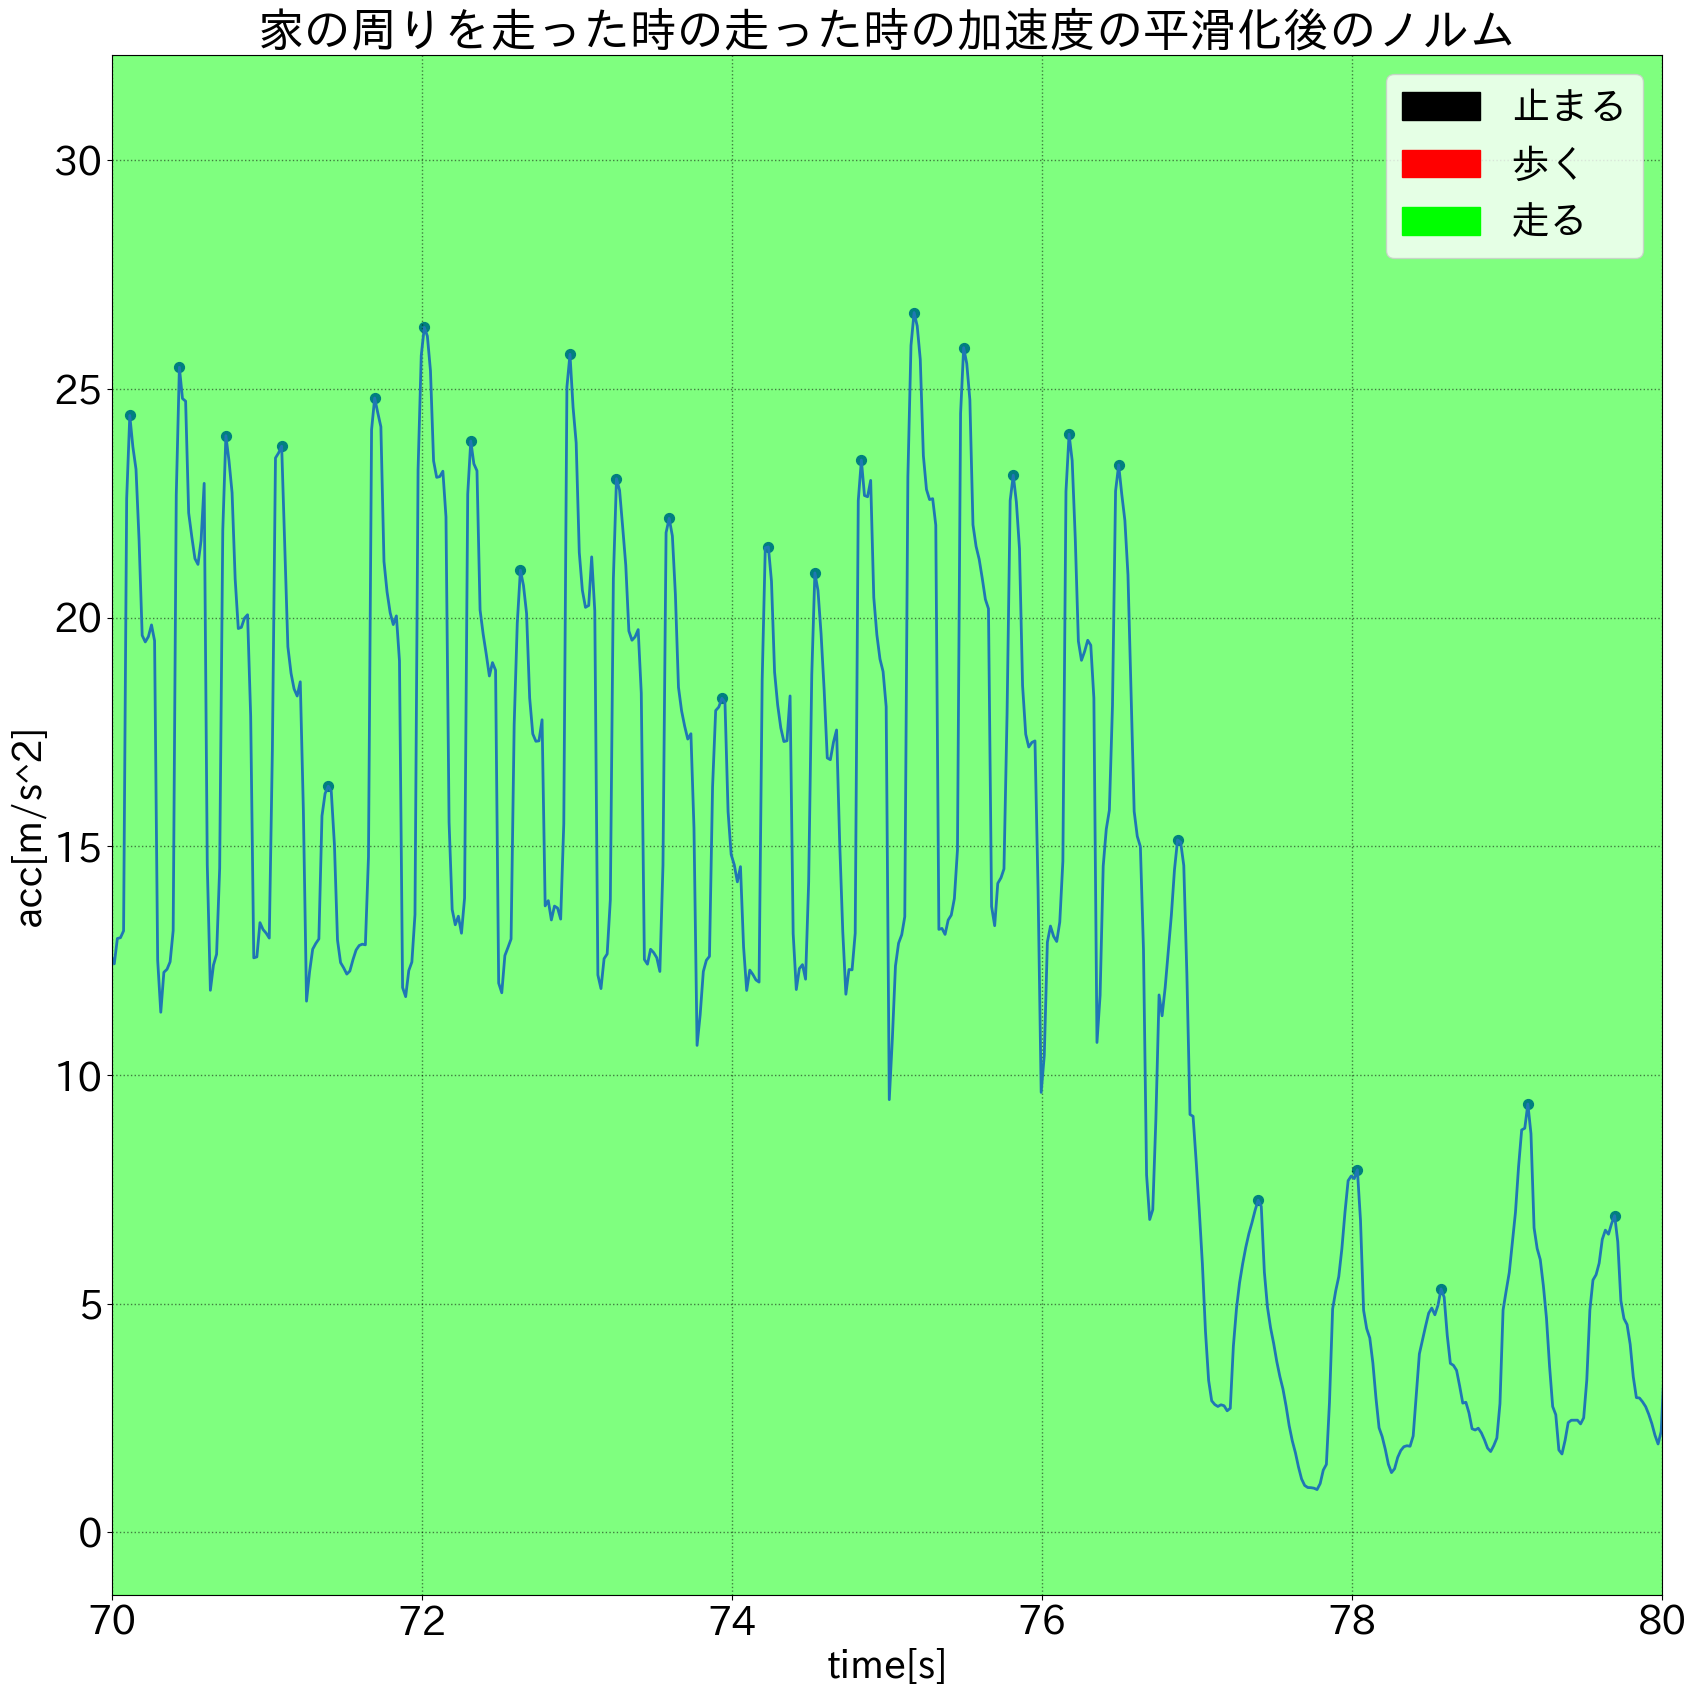

In [157]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title("家の周りを走った時の走った時の加速度の平滑化後のノルム")
## x軸のラベル
ax3.set_xlabel('time[s]')
## y軸のラベル
ax3.set_ylabel('acc[m/s^2]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作

x = acc["x"]
y = acc["y"]
z = acc["z"]
norm_acc = np.sqrt(x*x + y*y + z*z).rolling(window=10).mean()

## ノイズ除去
ax3.plot(
    (acc["time"]),
    norm_acc,
    label="x軸",
    linewidth=2,  # 線の太さを指定
)

## ピーク値を取得
peak , _ = signal.find_peaks(norm_acc, height=5, distance=10)
plt.scatter(acc["time"][peak], norm_acc[peak], c="b", s=50)

ax3.legend()

# 各contentに対応する色の辞書を作成
content_colors = {
    "止まる": "#000000",
    "歩く": "#ff0000",
    "走る": "#00ff00"
}


## 表示するデータの範囲を指定秒数にする
start_time = 70
end_time = 80
ax3.set_xlim(start_time, end_time)

## 周波数の取得
new_peak = []
for i in range(len(peak) - 1):
    ## endtime - starttimeの間にピークがあるかどうか
    # print(acc["time"][peak[i]])
    if (acc["time"][peak[i]] > start_time ) and (acc["time"][peak[i]] < end_time ):
        new_peak.append(peak[i])
freq = len(new_peak) / (end_time - start_time)
print("周波数", freq)

# 階段利用区間をラベリング
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    print(content)
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0] + paddingTime) / 1000
    end_time = 0
    if i < len(ans) - 1 :
        end_time = (ans["time"][i + 1] - ans["time"][0] + paddingTime) / 1000
    else :
        end_time = (acc["time"].max())

    print(start_time, end_time)
    ax3.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

# 凡例の作成
content_labels = list(content_colors.keys())
content_patches = [matplotlib.patches.Patch(color=color) for color in content_colors.values()]

# 凡例の表示
ax3.legend(content_patches, content_labels, loc="upper right")

plt.show()

In [158]:
# content毎に分割して、BLEのデータをFFTしてみる
# 椅子に座るだけ取得したデータを使う
# ansデータを使って、椅子に座っているかどうかを判定する

# 1. windowサイズ20データ分を用いて、FFTを行う
window_size = 200
for i in range(0, len(acc) - window_size, window_size):
    # 1.1. windowサイズ20データ分を取得する
    fft_acc_data = acc[i:i+window_size]   

    print(f"window_data: {fft_acc_data}")

    # print(f"fft_isu_data: {len(fft_isu_data)}")
    # print(f"fft_tent_data: {len(fft_tent_data)}")

    if debugMode:
        # fft_isu_dataをグラフ化する
        ## ｘ軸を時間にする
        ## y軸をrssiにする

        # 2. データをグラフ化する
        # 2.1. グラフのタイトルを設定する
        plt.figure(figsize=(20, 20))
        plt.title(f"加速度のデータ　{window_size}個分")
        # 2.2. グラフのx軸のラベルを設定する
        plt.xlabel("time(s)")
        # 2.3. グラフのy軸のラベルを設定する
        plt.ylabel("acc (m/s^2))")
        # 2.4. グラフのx軸の表示範囲を設定する
        # plt.xlim(start_time, end_time)
        # 2.5. グラフのy軸の表示範囲を設定する
        # plt.ylim(-100, -40)
        # 2.6. グラフにデータを追加する
        plt.plot([(x - fft_acc_data["time"].iloc[0]) / 1000 for x in fft_acc_data["time"]],fft_acc_data["x"].rolling(window=10).mean(), label="x")
        plt.plot([(x - fft_acc_data["time"].iloc[0]) / 1000 for x in fft_acc_data["time"]],fft_acc_data["y"].rolling(window=10).mean(), label="y")
        plt.plot([(x - fft_acc_data["time"].iloc[0]) / 1000 for x in fft_acc_data["time"]],fft_acc_data["z"].rolling(window=10).mean(), label="z")



        # 2.7. グラフに凡例を追加する
        plt.legend()
        # 2.8. グラフを表示する
        plt.show()






window_data:          time         x         y         z       abs
0    0.292859 -0.699107  0.411803  0.038307  0.812280
1    0.312871 -0.603339  0.383072  0.019154  0.714933
2    0.332873  0.153229 -0.095768 -0.153229  0.236917
3    0.352868 -0.181959  0.067038 -0.191536  0.272561
4    0.372911 -0.229843  0.143652 -0.114922  0.294399
..        ...       ...       ...       ...       ...
195  4.192872 -1.436521  1.024718  1.197101  2.132297
196  4.212882  0.632069 -1.082179 -0.459687  1.334891
197  4.232859  0.603339 -1.292869  0.852336  1.661928
198  4.252841  0.325611  0.134075  0.459687  0.579060
199  4.272866  0.651223 -0.009577 -0.430956  0.780965

[200 rows x 5 columns]
window_data:          time         x         y         z       abs
200  4.292856  0.900220  0.114922 -0.833182  1.231988
201  4.312857  0.900220  0.114922 -0.833182  1.231988
202  4.332876  1.742979  0.392649 -0.450110  1.842484
203  4.352850 -0.919373  1.235408  0.928950  1.798452
204  4.372857  1.513135  0.21069

サンプリング周波数: 50.00606231290194 Hz
            time content
0  1692565879228     止まる
1  1692565883793      歩く
2  1692565926067      走る
3  1692565943806      歩く
4  1692565983787      走る
5  1692566003808      歩く
6  1692566004444     止まる
17.0 21.565
21.565 63.839
63.839 81.578
81.578 121.559
121.559 141.58
141.58 142.216
142.216 165.2328606


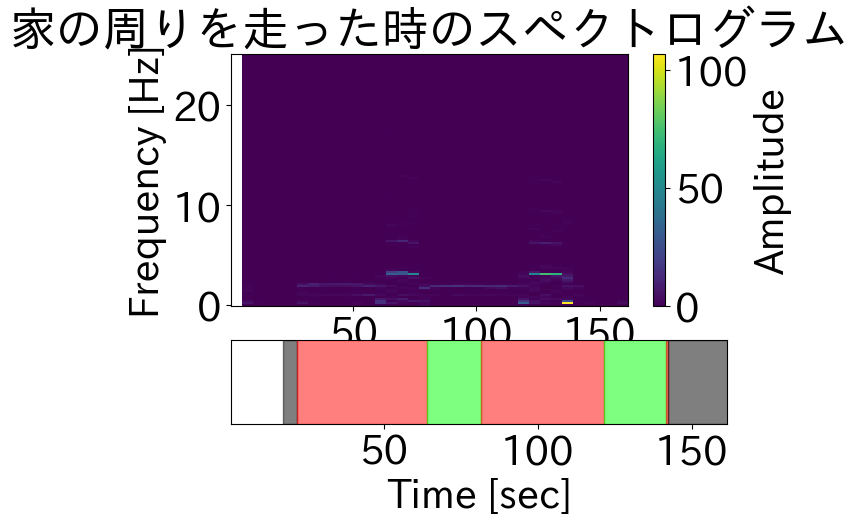

In [159]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# サンプリング周波数を計算する関数
def calculate_sampling_frequency(data):
    time_stamps = [data_point for data_point in data]
    time_interval = time_stamps[-1] - time_stamps[0]
    sampling_frequency = 1 / (time_interval / len(data))
    return sampling_frequency


# 以下、元のコードからの続き
x = acc["x"]
y = acc["y"]
z = acc["z"]
norm_acc = np.sqrt(x*x + y*y + z*z).rolling(window=10).mean()

fs = calculate_sampling_frequency(acc["time"])
norm = abs(norm_acc)

print("サンプリング周波数: {} Hz".format(fs))

# スペクトログラム分析の実施
f, t, Sxx = signal.spectrogram(norm, fs)

# サブプロットを作成
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

# スペクトログラムをax1に表示
cax = ax1.pcolormesh(t, f, Sxx)
ax1.set_ylabel('Frequency [Hz]')
ax1.set_xlabel('Time [sec]')
ax1.set_title("家の周りを走った時のスペクトログラム")
cbar1 = fig.colorbar(cax, ax=ax1)
cbar1.set_label("Amplitude")

# 各contentに対応する色の辞書を作成
content_colors = {
    "止まる": "#000000",
    "歩く": "#ff0000",
    "走る": "#00ff00"
}
print(ans)
# 正解データをax2に表示
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0] + paddingTime) / 1000
    end_time = 0
    if i < len(ans) - 1 :
        end_time = (ans["time"][i + 1] - ans["time"][0] + paddingTime) / 1000
    else :
        end_time = (acc["time"].max())

    print(start_time, end_time)

    ax2.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

ax2.set_xlabel('Time [sec]')
ax2.set_yticks([])
ax2.set_xlim(ax1.get_xlim())

plt.show()


In [160]:
# # 各時間スライスにおけるアンプリちゅーどの数を計算
# amplitude_counts = np.sum(Sxx, axis=0)
start = 0
end = 0

time = 1
# Sxxで10Hzごとにどれくらいのアンプリちゅーどがあるかを表示
for i, amplitude_count in enumerate(Sxx):
    for j, freq in enumerate(f):
        start = end

        if f[j] > 10:
            continue

        if freq > time*1 and len(t) > i:
            end = j

            # start から　 end までの列を合計する
            amplitude_count2 = np.sum(amplitude_count[start:end])
            ## 全てを少数第2位まで表示
            amplitude_count2 = round(amplitude_count2, 2)
            now_time = round(t[i], 2)
            start_hz = round(f[start], 2)
            end_hz = round(f[end], 2)
            
            print(f"{now_time}秒の{start_hz}Hzから{end_hz}Hzまでのアンプリチュードは{amplitude_count2}です")
            time += 1
    time = 1
    start = 0



2.56秒の0.0Hzから1.17Hzまでのアンプリチュードはnanです
2.56秒の1.17Hzから2.15Hzまでのアンプリチュードは0.5です
2.56秒の2.15Hzから3.13Hzまでのアンプリチュードは1.15です
2.56秒の3.13Hzから4.1Hzまでのアンプリチュードは2.63です
2.56秒の4.1Hzから5.08Hzまでのアンプリチュードは0.03です
2.56秒の5.08Hzから6.06Hzまでのアンプリチュードは1.75です
2.56秒の6.06Hzから7.03Hzまでのアンプリチュードは0.66です
2.56秒の7.03Hzから8.01Hzまでのアンプリチュードは0.0です
2.56秒の8.01Hzから9.18Hzまでのアンプリチュードは0.0です
7.04秒の9.18Hzから1.17Hzまでのアンプリチュードは0.0です
7.04秒の1.17Hzから2.15Hzまでのアンプリチュードは6.02です
7.04秒の2.15Hzから3.13Hzまでのアンプリチュードは23.08です
7.04秒の3.13Hzから4.1Hzまでのアンプリチュードは3.42です
7.04秒の4.1Hzから5.08Hzまでのアンプリチュードは0.48です
7.04秒の5.08Hzから6.06Hzまでのアンプリチュードは145.06です
7.04秒の6.06Hzから7.03Hzまでのアンプリチュードは4.68です
7.04秒の7.03Hzから8.01Hzまでのアンプリチュードは0.0です
7.04秒の8.01Hzから9.18Hzまでのアンプリチュードは0.0です
11.52秒の9.18Hzから1.17Hzまでのアンプリチュードは0.0です
11.52秒の1.17Hzから2.15Hzまでのアンプリチュードは1.47です
11.52秒の2.15Hzから3.13Hzまでのアンプリチュードは18.95です
11.52秒の3.13Hzから4.1Hzまでのアンプリチュードは11.26です
11.52秒の4.1Hzから5.08Hzまでのアンプリチュードは0.89です
11.52秒の5.08Hzから6.06Hzまでのアンプリチュードは47.53です
11.52秒の6.06Hzから7.03Hzまでのアンプリチュードは2.38です
11.52秒の7.03Hzから8.01Hzまでのアンプ